In [633]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [634]:
from google.colab import drive
drive.mount('/content/gdriv')

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).


In [635]:
data_path = "/content/gdriv/MyDrive/산데과"
data_list = os.listdir(data_path)
train_car = pd.read_csv(data_path + '/' + data_list[1])
my_car = pd.read_csv(data_path + '/' + data_list[2])
my_car.head()

,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Maker
0,2013,85000,Diesel,First,17.68,1968,174.33,5,NaN,Audi
1,2017,27000,Petrol,First,21.40,1197,83.10,5,NaN,Maruti
2,2016,45794,Diesel,First,13.01,2199,194.30,7,NaN,Hyundai
3,2013,57352,Diesel,First,14.39,1998,163.70,5,NaN,Chevrolet
4,2018,41467,Diesel,First,15.00,2143,204.00,5,NaN,Mercedes-Benz


In [636]:
my_car['Maker'].value_counts().index

Index(['Maruti', 'Hyundai', 'Toyota', 'Mercedes-Benz', 'Ford', 'Honda',
       'Renault', 'Volkswagen', 'Tata', 'Mahindra', 'Skoda', 'Audi', 'Nissan',
       'BMW', 'Chevrolet', 'Jaguar', 'Lamborghini', 'ISUZU', 'Volvo',
       'Mitsubishi'],
      dtype='object')

In [637]:
train_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5558 non-null   int64  
 1   Kilometers_Driven  5558 non-null   int64  
 2   Fuel_Type          5558 non-null   object 
 3   Owner_Type         5558 non-null   object 
 4   Mileage            5558 non-null   float64
 5   Engine             5558 non-null   int64  
 6   Power              5558 non-null   float64
 7   Seats              5556 non-null   float64
 8   New_Price          773 non-null    object 
 9   Maker              5558 non-null   object 
 10  Price              5558 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 477.8+ KB


In [638]:
my_car.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               250 non-null    int64  
 1   Kilometers_Driven  250 non-null    int64  
 2   Fuel_Type          250 non-null    object 
 3   Owner_Type         250 non-null    object 
 4   Mileage            250 non-null    float64
 5   Engine             250 non-null    int64  
 6   Power              250 non-null    float64
 7   Seats              250 non-null    int64  
 8   New_Price          41 non-null     float64
 9   Maker              250 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 19.7+ KB


# 데이터 전처리

In [639]:
my_car = my_car.drop('New_Price',axis=1)#250개의 행 중 New_Price는 41개만 값이 있으므로 제거함

In [640]:
my_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               250 non-null    int64  
 1   Kilometers_Driven  250 non-null    int64  
 2   Fuel_Type          250 non-null    object 
 3   Owner_Type         250 non-null    object 
 4   Mileage            250 non-null    float64
 5   Engine             250 non-null    int64  
 6   Power              250 non-null    float64
 7   Seats              250 non-null    int64  
 8   Maker              250 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 17.7+ KB


In [641]:
#연속형 데이터끼리의 상관 분석
col =['Mileage','Engine', 'Power','Kilometers_Driven']

## 변수 선택

In [642]:
#power와 engine은 높은 상관관계를 보임
#사람들은 차를 구매 할 때 Power 즉 마력을 주로 보므로 engine은 제외하고 Power만 사용
corr =my_car[col].corr(method='pearson')
corr

,Mileage,Engine,Power,Kilometers_Driven
Mileage,1.000000,-0.585390,-0.486514,-0.188562
Engine,-0.585390,1.000000,0.868486,0.167900
Power,-0.486514,0.868486,1.000000,-0.078993
Kilometers_Driven,-0.188562,0.167900,-0.078993,1.000000


In [643]:
#주관적인 생각으로 좌석수는 중고차 시장에서 크게 중요하지 않다고 생각되므로 생략
my_car = my_car.drop(['Engine','Seats','Owner_Type','Fuel_Type'],axis=1)

In [644]:
#data의 최종 형태
my_car.head()

,Year,Kilometers_Driven,Mileage,Power,Maker
0,2013,85000,17.68,174.33,Audi
1,2017,27000,21.40,83.10,Maruti
2,2016,45794,13.01,194.30,Hyundai
3,2013,57352,14.39,163.70,Chevrolet
4,2018,41467,15.00,204.00,Mercedes-Benz


In [645]:
col = list(my_car.columns)
col.append('Price')
train_car=train_car[col]
train_car.head()

,Year,Kilometers_Driven,Mileage,Power,Maker,Price
0,2015,41000,19.67,126.20,Hyundai,12.50
1,2011,46000,18.20,88.70,Honda,4.50
2,2012,87000,20.77,88.76,Maruti,6.00
3,2013,40670,15.20,140.80,Audi,17.74
4,2013,86999,23.08,63.10,Nissan,3.50


## 범주형 변환

In [646]:
train_car['Year'] = train_car['Year'].astype('object')
my_car['Year'] = my_car['Year'].astype('object')
# train_car['Seats'] = train_car['Seats'].astype('object')
# my_car['Seats'] = my_car['Seats'].astype('object')

In [647]:
train_car_1 = pd.get_dummies(train_car,drop_first=True)
my_car_1 = pd.get_dummies(my_car,drop_first=True)

In [648]:
print(train_car_1.columns)
print(my_car_1.columns)

Index(['Kilometers_Driven', 'Mileage', 'Power', 'Price', 'Year_1999',
       'Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Maker_Audi', 'Maker_BMW', 'Maker_Bentley', 'Maker_Chevrolet',
       'Maker_Datsun', 'Maker_Fiat', 'Maker_Force', 'Maker_Ford',
       'Maker_Honda', 'Maker_Hyundai', 'Maker_ISUZU', 'Maker_Isuzu',
       'Maker_Jaguar', 'Maker_Jeep', 'Maker_LandRover', 'Maker_Mahindra',
       'Maker_Maruti', 'Maker_Mercedes-Benz', 'Maker_Mini', 'Maker_Mitsubishi',
       'Maker_Nissan', 'Maker_Porsche', 'Maker_Renault', 'Maker_Skoda',
       'Maker_Tata', 'Maker_Toyota', 'Maker_Volkswagen', 'Maker_Volvo'],
      dtype='object')
Index(['Kilometers_Driven', 'Mileage', 'Power', 'Year_2003', 'Year_2004',
       'Year_2005', 'Year_2006', 'Year_200

In [649]:
print(train_car.columns)
print(my_car.columns)

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Maker', 'Price'], dtype='object')
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Maker'], dtype='object')


In [650]:
#보면 학습을 위한 data의 범주형 데이터엔 있는 값들이 test를 위한 data에는 존재하지 않기에
#열의 수가 다른 현상이 발생 어쩔 수 없이 year와 Maker변수는 삭제
# my_car = my_car.drop(['Year','Maker'],axis=1)
# train_car = train_car.drop(['Year','Maker'],axis=1)
## 원래는 저 두 열을 지우려고 했으나 R^2값이 음수가 나오는 관계로 데이터를 조작하기로 결정

### 데이터 조작
* year data 2000년부터 5년 단위로 나누기로 결정
* 자동차 제조사는 국가로 결정

In [651]:
new_year_train = []
new_year_my = []
for i in train_car['Year']:
  if i < 2005:
    new_year_train.append('first')
  elif 2005<=i <2010:
    new_year_train.append('second')
  elif 2010<=i <2015:
    new_year_train.append('third')
  elif 2015<=i <2020:
    new_year_train.append('fourth')

for i in my_car['Year']:
  if i < 2005:
    new_year_my.append('first')
    print(i)
  elif 2005<=i <2010:
    new_year_my.append('second')
  elif 2010<=i <2015:
    new_year_my.append('third')
  elif 2015<=i <2020:
    new_year_my.append('fourth')

2004
2004
2003
2000
2004


In [652]:
new_maker_train=[]
new_maker_my = []
japan = ['Audi', 'Datsun', 'Isuzu', 'Mitsubishi', 'Nissan', 'Toyota','Honda','ISUZU']
ger = ['BMW', 'Mercedes-Benz', 'Porsche', 'Skoda', 'Volkswagen']
eng = ['Bentley', 'Jaguar', 'LandRover', 'Mini']
am = ['Chevrolet', 'Jeep','Ford']
ity = ['Fiat','Lamborghini']
indi = ['Force', 'Mahindra' ,'Maruti', 'Tata','Ambassador']
fra = ['Renault']
swa = ['Volvo']
kor = ['Hyundai']
for i in train_car['Maker']:
  if i in japan:
    new_maker_train.append('jap')
  elif i in ger:
    new_maker_train.append('ger')
  elif i in eng:
    new_maker_train.append('eng')
  elif i in am:
    new_maker_train.append('am')
  elif i in ity:
    new_maker_train.append('ity')
  elif i in indi:
    new_maker_train.append('indi')
  elif i in fra:
    new_maker_train.append('fra')
  elif i in swa:
    new_maker_train.append('swa')
  elif i in kor:
    new_maker_train.append('kor')

for i in my_car['Maker']:
  if i in japan:
    new_maker_my.append('jap')
  elif i in ger:
    new_maker_my.append('ger')
  elif i in eng:
    new_maker_my.append('eng')
  elif i in am:
    new_maker_my.append('am')
  elif i in ity:
    new_maker_my.append('ity')
  elif i in indi:
    new_maker_my.append('indi')
  elif i in fra:
    new_maker_my.append('fra')
  elif i in swa:
    new_maker_my.append('swa')
  elif i in kor:
    new_maker_my.append('kor')

In [653]:
train_car['Year'] = new_year_train
my_car['Year'] = new_year_my

In [654]:
train_car['Maker'] = new_maker_train
my_car['Maker'] = new_maker_my

In [655]:
# train_car=train_car.drop(['Year'],axis=1)

In [656]:
train_car = pd.get_dummies(train_car,drop_first=True)
my_car = pd.get_dummies(my_car,drop_first=True)

In [657]:
print(train_car.columns)
print(my_car.columns)

Index(['Kilometers_Driven', 'Mileage', 'Power', 'Price', 'Year_fourth',
       'Year_second', 'Year_third', 'Maker_eng', 'Maker_fra', 'Maker_ger',
       'Maker_indi', 'Maker_ity', 'Maker_jap', 'Maker_kor', 'Maker_swa'],
      dtype='object')
Index(['Kilometers_Driven', 'Mileage', 'Power', 'Year_fourth', 'Year_second',
       'Year_third', 'Maker_eng', 'Maker_fra', 'Maker_ger', 'Maker_indi',
       'Maker_ity', 'Maker_jap', 'Maker_kor', 'Maker_swa'],
      dtype='object')


## 데이터 분리

In [658]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(train_car,train_size=0.8)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print(len(train))
print(len(test))

4446
1112


In [659]:
train_y = train['Price'].to_numpy()
train_x = train.drop(['Price'],axis=1).to_numpy()
test_y = test['Price'].to_numpy()
test_x = test.drop('Price',axis=1).to_numpy()
my_x = my_car.to_numpy()

## scale 조정
* 안하는게 훨씬 나음

In [660]:
# import sklearn.preprocessing
# scaler = sklearn.preprocessing.MinMaxScaler()
# train_X = scaler.fit_transform(train_x)
# test_X = scaler.fit_transform(test_x)

In [661]:
train_x

array([[5.4308e+04, 1.7100e+01, 1.2130e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [5.7000e+04, 2.0770e+01, 8.8800e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.6752e+04, 1.7400e+01, 1.1730e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.7585e+04, 1.6020e+01, 9.3700e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.1290e+04, 1.6000e+01, 1.4000e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.7873e+04, 2.2320e+01, 1.2632e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

# 모델링

In [662]:
model = LinearRegression(fit_intercept=False,normalize=True,copy_X=True)

In [663]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [664]:
print('R-Square:{}'.format(model.score(train_x,train_y)))
print('R-Square:{}'.format(model.score(test_x,test_y)))

R-Square:0.7032250064793385
R-Square:0.6668194528977337


# 모델평가

In [665]:
train_predict = model.predict(train_x)
compare = pd.concat([pd.DataFrame(abs(train_predict)),pd.DataFrame(train_y)],axis=1)
compare

,0,0
0,7.543317,4.28
1,3.650049,7.00
2,7.539555,3.57
3,9.083631,8.90
4,3.067372,4.25
...,...,...
4441,5.250727,4.75
4442,42.139006,19.00
4443,5.510461,6.35
4444,16.551941,10.94


In [666]:
mean_squared_error(train_predict,train_y)

37.683037348187085

In [667]:
test_predict = model.predict(test_x)
compare = pd.concat([pd.DataFrame(abs(test_predict)),pd.DataFrame(test_y)],axis=1)
compare

,0,0
0,0.851800,2.35
1,7.239580,5.77
2,3.242520,5.00
3,19.480461,19.50
4,16.294561,25.64
...,...,...
1107,7.756863,5.45
1108,3.172462,5.35
1109,19.585315,9.75
1110,33.011394,21.50


In [668]:
mean_squared_error(test_predict,test_y)

39.25202013417122

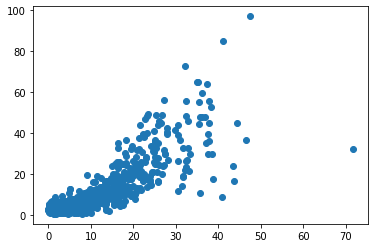

In [669]:
compare.columns = ['pred','real']
plt.scatter(compare['pred'],compare.real)

In [670]:
my_predict = model.predict(my_car)
result = pd.DataFrame(abs(my_predict)).to_csv(data_path+'/+result.csv')